In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skbeam.core.accumulators.droplet import dropletfind, dropletanal

%matplotlib inline

In [3]:
def hit(img, xcen, ycen, adu, sigma):
    ''' hit an image with a Gaussian photon of ADU and sigma.'''
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    X,Y = np.meshgrid(x,y)
    C = adu/(2*np.pi*sigma**2)
    img += C*np.exp(-((X-xcen)**2 + (Y-ycen)**2)/(2.*sigma**2))

In [4]:
# hit detector with Nphots photons with avg ADU 800 electrons and stdev of 15 ADU
Nphots = 600
adu0 = 800
sigma_adu = 15
sigma_charge = 2 #(in pixels)
img = np.zeros((1000,1000))
Nx = img.shape[1]
Ny = img.shape[0]
for i in range(Nphots):
    xcen = (np.random.random(1)[0]-.5)*(Nx-10*sigma_charge) + Nx/2
    ycen = (np.random.random(1)[0]-.5)*(Ny-10*sigma_charge) + Ny/2
    adu = np.random.normal(loc=adu0,scale=sigma_adu)
    hit(img, xcen, ycen, adu, sigma_charge)

#img = (np.random.random((100,100))*100).astype(int)

In [5]:
# typical thresholding at an xray beamline
#img = (img > adu0/2.)*img
# digitize into adu
img = ((img > 0)*img).astype(int)

#make binary image for the droplet analysis
bimg = (img > 0).astype(int)

In [6]:
# the droplet analysis
npeaks, dimg = dropletfind(bimg)
npix, xcen, ycen, adus, idlist = dropletanal(img, dimg, npeaks)

# histogram the ADUS
hcnts = np.bincount(adus)

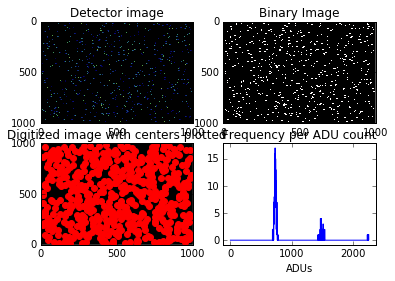

In [7]:
# plotting

plt.figure(0);plt.clf();

plt.subplot(2,2,1);
plt.imshow(img)
plt.title("Detector image")

plt.subplot(2,2,2);
plt.imshow(bimg);
plt.title("Binary Image")

plt.subplot(2,2,3);
plt.title("Digitized image with centers plotted")
plt.imshow(dimg);
plt.plot(xcen,ycen,'ro');
plt.xlim(-.5,dimg.shape[1]+.5)
plt.ylim(-.5,dimg.shape[0]+.5)

plt.subplot(2,2,4);
plt.plot(hcnts);
plt.xlabel("ADUs")
plt.title("Frequency per ADU count")